<a href="https://colab.research.google.com/github/git-hatano/pytorch_advanced/blob/main/2_8_SSD_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[2.8 推論の実施](https://github.com/YutaroOgawa/pytorch_advanced/blob/master/2_objectdetection/2-8_SSD_inference.ipynb)

##事前準備

utils のファイルをダウンロードし、下記のフォルダにアップロード
https://github.com/YutaroOgawa/pytorch_advanced/tree/master/2_objectdetection/utils

In [1]:
import os
import urllib.request
import zipfile
import tarfile

utils_dir = "./utils"
if not os.path.exists(utils_dir):
    os.mkdir(utils_dir)

# フォルダ「data」が存在しない場合は作成する
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# フォルダ「weights」が存在しない場合は作成する
weights_dir = "./weights/"
if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

In [2]:
# 学習済みのSSD300モデルをフォルダ「weights」にダウンロード
# MIT License
# Copyright (c) 2017 Max deGroot, Ellis Brown
# https://github.com/amdegroot/ssd.pytorch

url = "https://s3.amazonaws.com/amdegroot-models/ssd300_mAP_77.43_v2.pth"
target_path = os.path.join(weights_dir, "ssd300_mAP_77.43_v2.pth") 

if not os.path.exists(target_path):
    urllib.request.urlretrieve(url, target_path)

In [3]:
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt 
import numpy as np
import torch

%matplotlib inline

##推論

In [4]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

#SSD300の設定
ssd_cfg = {
    'num_classes': 21,
    'input_size': 300,
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 出力するDBoxのアスペクト比の種類
    'feature_maps': [38, 19, 10, 5, 3, 1],  # 各sourceの画像サイズ
    'steps': [8, 16, 32, 64, 100, 300],  # DBOXの大きさを決める
    'min_sizes': [30, 60, 111, 162, 213, 264],  # DBOXの大きさを決める
    'max_sizes': [60, 111, 162, 213, 264, 315],  # DBOXの大きさを決める
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}
#model
net = SSD(phase='inference', cfg=ssd_cfg)

#SSDの学習済みの重みを設定
net_weights = torch.load("/content/weights/ssd300_mAP_77.43_v2.pth", map_location={'cuda:0': 'cpu'})
net.load_state_dict(net_weights)
print('ネットワーク設定完了：学習済みの重みをロードしました')

ネットワーク設定完了：学習済みの重みをロードしました


本のコードをそのまま実行するとエラーが出る。

ssd_modelの修正が必要

https://github.com/YutaroOgawa/pytorch_advanced/issues/71#issuecomment-626249335

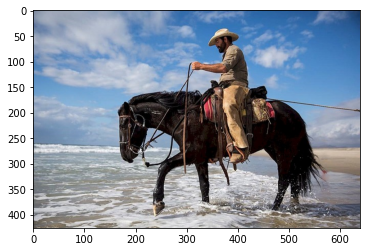

torch.Size([1, 21, 200, 5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0217, 0.0143, 0.8602, 0.1342, 0.9310],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0385, 0.7289, 0.7485, 0.8518, 0.9207],
          [0.0211, 0.7424, 0.8170, 0.8265, 0.9280],
          [0.0146, 0.7626, 0.8616, 0.8466, 0.9242],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.00

/content/utils/ssd_model.py:590: UserWarning: An output with one or more elements was resized since it had shape [13], which does not match the required output shape [4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(x1, 0, idx, out=tmp_x1)
/content/utils/ssd_model.py:591: UserWarning: An output with one or more elements was resized since it had shape [13], which does not match the required output shape [4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(y1, 0, idx, ou

In [5]:
from utils.ssd_model import DataTransform

#画像の読み込み
image_file_path = "/content/data/cowboy-757575_640.jpg"
img = cv2.imread(image_file_path)
height, width, channels = img.shape

#元画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#前処理クラスの設定
color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

#前処理
phase = 'val'
img_transformed, boxes, labels = transform(img, phase, "", "")
img = torch.from_numpy(img_transformed[:, :, (2,1,0)]).permute(2,0,1)

#予測
net.eval()
x = img.unsqueeze(0) # ミニバッチ化：torch.Size([1, 3, 300, 300])
detections = net(x)

print(detections.shape)
print(detections)

/content/utils/ssd_model.py:590: UserWarning: An output with one or more elements was resized since it had shape [9], which does not match the required output shape [4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(x1, 0, idx, out=tmp_x1)
/content/utils/ssd_model.py:591: UserWarning: An output with one or more elements was resized since it had shape [9], which does not match the required output shape [4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:17.)
  torch.index_select(y1, 0, idx, out=

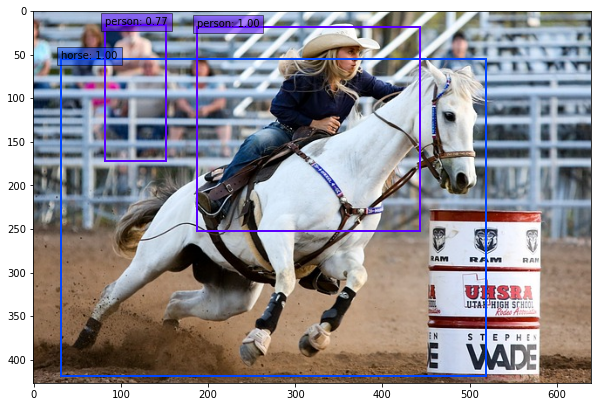

In [7]:
# 画像に対する予測
from utils.ssd_predict_show import SSDPredictShow

# ファイルパス
image_file_path = "/content/data/rodeo-3578528_640.jpg"

# 予測と、予測結果を画像で描画する
ssd = SSDPredictShow(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, data_confidence_level=0.6)